<body>
    <h1><font color='Tomato'><center>BDAT 1004 - Problem Set 3</center></font></h1>
    <p>
        <strong>Student:</strong> Lais Assini Cavalheiro<br>
        <strong>Student ID:</strong> 20558473<br><br>
    </p>
</body>

<body>
    <h3><font color='Tomato'>Question 1</font></h3>
    <p>Introduction: <br> Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.<br>  Occupations<br>
        Step 1. Import the necessary libraries<br> Step 2. Import the dataset from this address. <br>Step 3. Assign it to a variable called users <br>Step 4. Discover what is the mean age per occupation <br>Step 5. Discover the Male ratio per occupation and sort it from the most to the least <br>Step 6. For each occupation, calculate the minimum and maximum ages <br>Step 7. For each combination of occupation and sex, calculate the mean age <br>Step 8. For each occupation present the percentage of women and men </p>
</body>

In [9]:
#Step 1. Import the necessary libraries
import pandas as pd

#Step 2. Import the dataset from this address.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

#Step 3. Assign it to a variable called users
users = pd.read_csv(url, sep ='|')

display(users)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [21]:
#Step 4. Discover what is the mean age per occupation

MeanAge_PerOccupation = users.groupby('occupation')['age'].mean()
MeanAge_Table = pd.DataFrame({'mean age':MeanAge_PerOccupation})

display(MeanAge_Table)

,mean age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [44]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least

RatioMale_PerOccupation = users.groupby('occupation')['gender'].value_counts(normalize=True).unstack()

RatioMale_PerOccupation['male ratio'] = RatioMale_PerOccupation['M']/(RatioMale_PerOccupation.count(1))

SortedData = RatioMale_PerOccupation.sort_values(by='male ratio', ascending=False)

display(SortedData)

gender,F,M,male ratio
occupation,,,
doctor,NaN,1.000000,1.000000
engineer,0.029851,0.970149,0.485075
technician,0.037037,0.962963,0.481481
retired,0.071429,0.928571,0.464286
programmer,0.090909,0.909091,0.454545
executive,0.093750,0.906250,0.453125
scientist,0.096774,0.903226,0.451613
entertainment,0.111111,0.888889,0.444444
lawyer,0.166667,0.833333,0.416667


In [31]:
#Step 6. For each occupation, calculate the minimum and maximum ages

Max_Min_ages = users.groupby('occupation')['age'].aggregate([('min age', 'min'), ('max age', 'max')])

display(Max_Min_ages)

,min age,max age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [38]:
#Step 7. For each combination of occupation and sex, calculate the mean age
occupation_sex_age = users[['occupation','gender','age']]
occupation_sex_age_MEAN = occupation_sex_age.groupby(['occupation', 'gender']).mean('age')

display(occupation_sex_age_MEAN)

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [107]:
#Step 8. For each occupation present the percentage of women and men

occupation_gender = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

occupation = occupation_gender.sum(axis=1)
percentage = occupation_gender.div(occupation, axis=0) * 100

display(percentage)

gender,F,M
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,0.000000,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


<body>
    <h3><font color='Tomato'>Question 2</font></h3>
    <p>Euro Teams <br>Step 1. Import the necessary libraries <br>Step 2. Import the dataset from this address <br>Step 3. Assign it to a variable called euro12 <br>Step 4. Select only the Goal column <br>Step 5. How many team participated in the Euro2012? <br>Step 6. What is the number of columns in the dataset? <br>Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline <br>Step 8. Sort the teams by Red Cards, then to Yellow Cards <br> Step 9. Calculate the mean Yellow Cards given per Team <br>Step 10. Filter teams that scored more than 6 goals <br>Step 11. Select the teams that start with G <br>Step 12. Select the first 7 columns <br>Step 13. Select all columns except the last 3 <br>Step 14. Present only the Shooting Accuracy from England, Italy and Russia  </p>
</body>

In [113]:
#Step 1. import the necessary libraries

import pandas as pd

#Step 2. Import the dataset

Dataset_Euro = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

#Step 3. Assign it to a variable called euro12

euro12 = pd.read_csv(Dataset_Euro, sep = ',')

display(euro12)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [114]:
# Step 4. Select only the Goal column

goal_Column = euro12[['Goals']]
display(goal_Column)

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [118]:
#Step 5. How many team participated in the Euro2012?

total_Teams = euro12['Team'].count()

print("The number of teams that participated in the Euro2012 is {}.".format(total_Teams))

The number of teams that participated in the Euro2012 is 16.


In [119]:
# Step 6. What is the number of columns in the dataset?

total_Columns = euro12.shape[1]
print("The number of columns in the dataset is {}".format(total_Columns))

The number of columns in the dataset is 35


In [121]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline


discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
display(discipline)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [123]:
# Step 8: Sort the teams by Red Cards, then by Yellow Cards

discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

display(discipline_sorted)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [127]:
# Step 9: Calculate the mean Yellow Cards given per Team

mean_Yellow_Cards = discipline['Yellow Cards'].mean()
print("The mean yellow cards given per team is {}".format(mean_Yellow_Cards))

The mean yellow cards given per team is 7.4375


In [130]:
# Step 10: Filter teams that scored more than 6 goals

more_Six_Goals = euro12[euro12['Goals'] > 6]

display(more_Six_Goals)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [131]:
# Step 11: Select the teams that start with G

start_with_G = euro12[euro12['Team'].str.startswith('G')]
display(start_with_G)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [136]:
# Step 12. Select the first 7 columns

first_7columns = euro12.iloc[:, :7]

display(first_7columns)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [138]:
# Step 13. Select all columns except the last 3

columns_without_Last3 = euro12.iloc[:, :-3]
display(columns_without_Last3)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [139]:
# Step 14: Display Shooting Accuracy from England, Italy, and Russia

shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
display(shooting_accuracy)

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


<body>
    <h3><font color='Tomato'>Question 3</font></h3>
    <p>Housing <br>Step 1. Import the necessary libraries <br>Step 2. Create 3 differents Series, each of length 100, as follows: </p><ul><li>The first a random number from 1 to 4</li><li>The second a random number from 1 to 3</li><li>The third a random number from 10,000 to 30,000</ul> <p>Step 3. Create a DataFrame by joinning the Series by column <br>Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter <br>Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn' <br>Step 6. Ops it seems it is going only until index 99. Is it true? <br>Step 7. Reindex the DataFrame so it goes from 0 to 299 </p>
</body>

In [151]:
#Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

#Step 2. Create 3 differents Series, each of length 100
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))

display(series1.head())

display(series2.head())

display(series3.head())

0    4
1    4
2    3
3    4
4    4
dtype: int32

0    1
1    1
2    2
3    2
4    3
dtype: int32

0    13658
1    13378
2    28386
3    18108
4    19784
dtype: int32

In [156]:
#Step 3. Create a DataFrame by joinning the Series by column

df_seriesByColumn = pd.DataFrame({'Series 1': series1, 'Series 2': series2, 'Series 3': series3})

display(df_seriesByColumn.head())

,Series 1,Series 2,Series 3
0,4,1,13658
1,4,1,13378
2,3,2,28386
3,4,2,18108
4,4,3,19784


In [167]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

df_seriesByColumn.rename(columns={'Series 1': 'bedrs', 'Series 2': 'bathrs', 'Series 3': 'price_sqr_meter'}, inplace=True)

display(df_seriesByColumn.head())

,bedrs,bathrs,price_sqr_meter
0,4,1,13658
1,4,1,13378
2,3,2,28386
3,4,2,18108
4,4,3,19784


In [170]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.DataFrame({'bigcolumn': pd.concat([series1, series2, series3])})

display(bigcolumn)

,bigcolumn
0,4
1,4
2,3
3,4
4,4
...,...
95,21663
96,11065
97,11021
98,10103


In [162]:
# Step 6: Check if the index goes only until 99
index_max = bigcolumn.index.max()

# Print the last index of bigcolumn
print("The last index of 'bigcolumn' is {}".format(index_max))

The last index of 'bigcolumn' is 99


In [172]:
# Step 7: Reindex the DataFrame to go from 0 to 299

bigcolumn.reset_index(drop=True, inplace=True)

display(bigcolumn)

,bigcolumn
0,4
1,4
2,3
3,4
4,4
...,...
295,21663
296,11065
297,11021
298,10103


In [174]:
index_maxNEW = bigcolumn.index.max()

# Print the last index of bigcolumn
print("Now, the last index of 'bigcolumn' is {}".format(index_maxNEW))

Now, the last index of 'bigcolumn' is 299


<body>
    <h3><font color='Tomato'>Question 4</font></h3>
    <p>Wind Statistics  <br>The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question.  <br><br>You should be able to perform all of these operations without using a for loop or other looping construct.  <br><br>The data in 'wind.data' has the following format: <br>Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL 61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04 61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83 61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71 <br><br>The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.  <br>Step 1. Import the necessary libraries <br>Step 2. Import the dataset from the attached file wind.txt <br>Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index. <br>Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it. <br>Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]. <br>Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below. <br>Step 7. Compute how many non-missing values there are in total. <br>Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset. <br>Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location. <br>Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day. <br>Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January. <br>Step 12. Downsample the record to a yearly frequency for each location. <br>Step 13. Downsample the record to a monthly frequency for each location. <br>Step 14. Downsample the record to a weekly frequency for each location. <br>Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks. </p>
</body>

In [196]:
#Step 1. Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
file_path = 'wind.txt'
data = pd.read_csv(file_path, sep='\s+', parse_dates=[[0, 1, 2]])

display(data)


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [197]:
#Step3 Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data.columns = ['Date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

display(data)

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [198]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

def fix_year(date):
    year = date.year - 100 if date.year > 1989 else date.year
    return pd.Timestamp(year, date.month, date.day)

data['Date'] = data['Date'].apply(fix_year)

display(data)

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [199]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]. 
data.set_index('Date', inplace=True)

display(data)


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [201]:
display(data.index) 

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [205]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below. 

missing_values = data.isnull().sum()

print(missing_values)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [206]:
#Step 7. Compute how many non-missing values there are in total. 

non_missing = data.count().sum()

print(non_missing)

78857


In [208]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. 

mean_windspeeds = data.mean().mean()

print(mean_windspeeds)

10.227982360836938


In [213]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

display(loc_stats)


,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [215]:
#Step10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. 

day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

display(day_stats.head())

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [220]:
# Step 11. Find the average windspeed in January for each location. 

average_windspeed_JAN = data[data.index.month == 1].mean()

average_windspeed_JAN_Table = pd.DataFrame({'Avg Windspeed': average_windspeed_JAN})

display(average_windspeed_JAN_Table)

,Avg Windspeed
RPT,14.847325
VAL,12.914560
ROS,13.299624
KIL,7.199498
SHA,11.667734
BIR,8.054839
DUB,11.819355
CLA,9.512047
MUL,9.543208
CLO,10.053566


In [225]:
# Step 12. Downsample the record to a yearly frequency for each location. 

freq_yearly = data.resample('Y').mean()

display(freq_yearly.head())

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644


In [224]:
# Step 13. Downsample the record to a monthly frequency for each location. 

freq_monthly = data.resample('M').mean()

display(freq_monthly.head())

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613


In [226]:
#Step 14. Downsample the record to a weekly frequency for each location. 

freq_weekly = data.resample('W').mean()

display(freq_weekly.head())

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000


In [230]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week

infos_week = freq_weekly[:52].agg(['min', 'max', 'mean', 'std'])

display(infos_week)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,4.202857,4.255714,6.738571,3.300000,6.112857,2.715714,3.964286,4.257143,4.501429,6.031429,5.875714,5.737143
max,19.880000,16.417143,18.225714,12.720000,17.432857,14.828571,15.565714,15.160000,14.480000,16.461429,21.832857,23.641429
mean,12.316163,10.436978,11.296667,6.998690,10.930691,7.810330,9.764986,8.908732,8.732106,9.914712,13.658352,13.723933
std,3.419077,2.900003,2.789210,2.091987,2.674869,2.426344,2.850023,2.447832,2.412421,2.595592,3.640914,3.583555


<body>
    <h3><font color='Tomato'>Question 5</font></h3>
    <p>Step 1. Import the necessary libraries <br>Step 2. Import the dataset from this address. <br>Step 3. Assign it to a variable called chipo. <br>Step 4. See the first 10 entries <br>Step 5. What is the number of observations in the dataset? <br>Step 6. What is the number of columns in the dataset? <br>Step 7. Print the name of all the columns. <br>Step 8. How is the dataset indexed? <br>Step 9. Which was the most-ordered item? <br>Step 10. For the most-ordered item, how many items were ordered? <br>Step 11. What was the most ordered item in the choice_description column? <br>Step 12. How many items were orderd in total? <br>Step 13.</p><ul><li>Turn the item price into a float Check the item price type/li><li>Create a lambda function and change the type of item price</li><li>Check the item price type </li></ul><p>Step 14. How much was the revenue for the period in the dataset? <br>Step 15. How many orders were made in the period? <br>Step 16. What is the average revenue amount per order? <br>Step 17. How many different items are sold? </p>
</body>

In [235]:
# Step 1. Import the necessary libraries
import pandas as pd

#Step 2. Import the dataset from this address.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

#Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(url, sep='\t')

#Step 4. See the first 10 entries
display(chipo.head(10))

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [238]:
#Step 5. What is the number of observations in the dataset?

observations = chipo.shape[0]
print("The number of observations in the dataset is {}".format(observations))

The number of observations in the dataset is 4622


In [239]:
# Step 6. What is the number of columns in the dataset?

columns = chipo.shape[1]
print("The number of columns in the dataset  is {}".format(columns))

The number of columns in the dataset  is 5


In [241]:
#Step 7. Print the name of all the columns.

print("Column names:\n")

for i in chipo.columns:
    print(i)

Column names:

order_id
quantity
item_name
choice_description
item_price


In [242]:
#Step 8. How is the dataset indexed?
display(chipo.index)

RangeIndex(start=0, stop=4622, step=1)

In [243]:
#Step 9. Which was the most-ordered item?
item_most_ordered = chipo.groupby('item_name')['quantity'].sum().idxmax()
print(item_most_ordered)

Chicken Bowl


In [248]:
# Step 10. For the most-ordered item, how many items were ordered?

most_ordered_item = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)
most_ordered_item_name = most_ordered_item.index[0]
most_ordered_item_quantity = most_ordered_item.iloc[0]

print("For the most-ordered item '{}', {} items were ordered.".format(most_ordered_item_name, most_ordered_item_quantity))

For the most-ordered item 'Chicken Bowl', 761 items were ordered.


In [253]:
#Step 11. What was the most ordered item in the choice_description column? 

most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print(most_ordered_choice)

[Diet Coke]


In [254]:
# Step 12. How many items were ordered in total?
total_ordered = chipo['quantity'].sum()
print(total_ordered)

4972


In [260]:
#Step 13

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

print(chipo['item_price'].dtype)

float64


In [261]:
#Step 14. How much was the revenue for the period in the dataset?

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

print(total_revenue)


39237.02


In [262]:
#Step 15. How many orders were made in the period?
orders = chipo['order_id'].nunique()

print(orders)

1834


In [263]:
#Step 16. What is the average revenue amount per order?
average_Revenue_PerOrder = chipo['revenue'].sum() / chipo['order_id'].nunique()

print(average_Revenue_PerOrder)

21.39423118865867


In [264]:
#Step 17. How many different items are sold?
items_sold = chipo['item_name'].nunique()

print(items_sold)

50


<body>
    <h3><font color='Tomato'>Question 6</font></h3>
    <p>Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. <br>Don't forget to label your axes!</p>
</body>


In [265]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(filepath)

display(data.head())

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


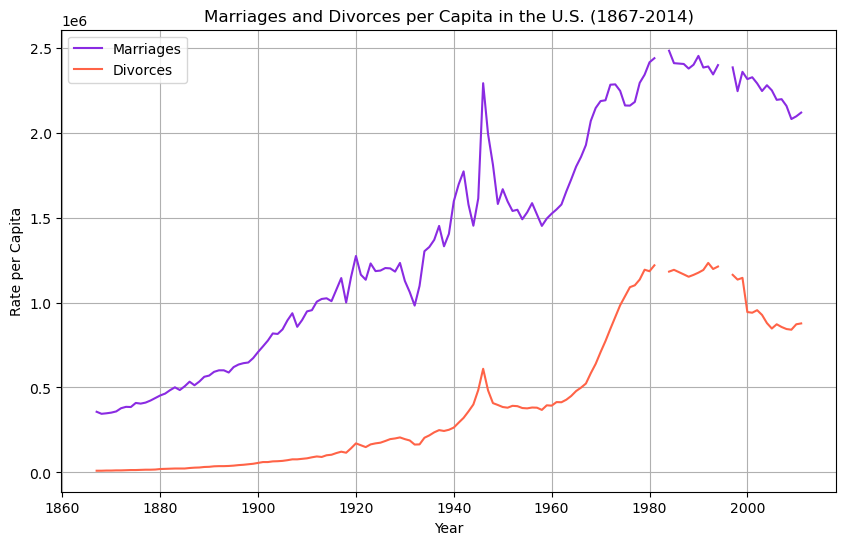

In [268]:
years = data['Year']
marriages = data['Marriages']
divorces = data['Divorces']


plt.figure(figsize=(10, 6))
plt.plot(years, marriages, label='Marriages', color='blueviolet')
plt.plot(years, divorces, label='Divorces',color='tomato')

plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.grid(True)
plt.show()

<body>
    <h3><font color='Tomato'>Question 7</font></h3>
    <p>Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. <br>Don't forget to label your axes!</p>
</body>

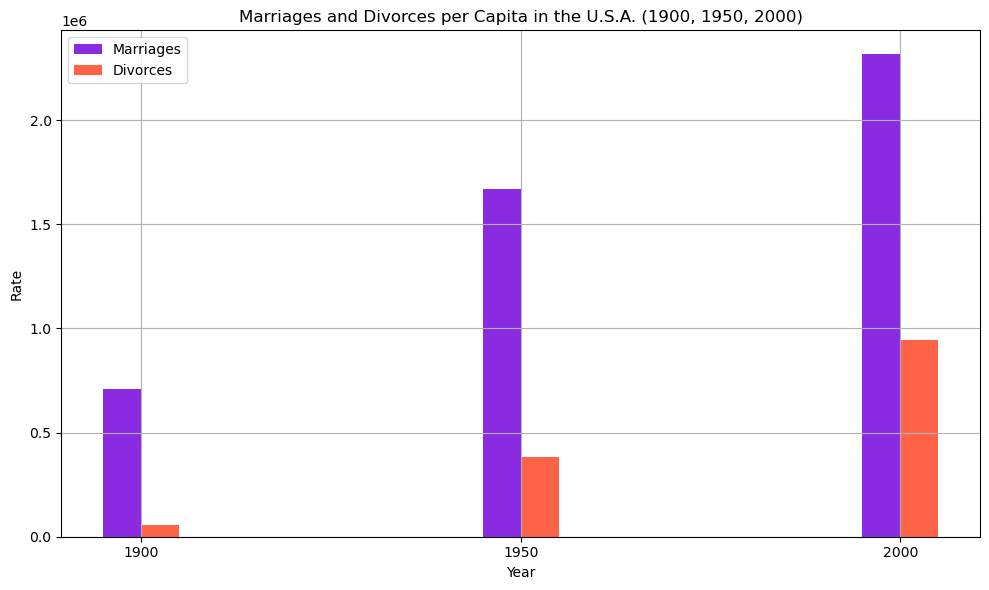

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

years = [1900, 1950, 2000]
selected_years = data[data['Year'].isin(years)]

marriages = selected_years['Marriages']
divorces = selected_years['Divorces']

plt.figure(figsize=(10, 6))

bar_width = 5.0
plt.bar(years, marriages, bar_width, label='Marriages', color='blueviolet')
plt.bar([x + bar_width for x in years], divorces, bar_width, label='Divorces',color='tomato')

plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Marriages and Divorces per Capita in the U.S.A. (1900, 1950, 2000)')
plt.xticks([x + bar_width/2 for x in years], years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<body>
    <h3><font color='Tomato'>Question 8</font></h3>
    <p>Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.<br>Don't forget to label your axes!</p>
</body>

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


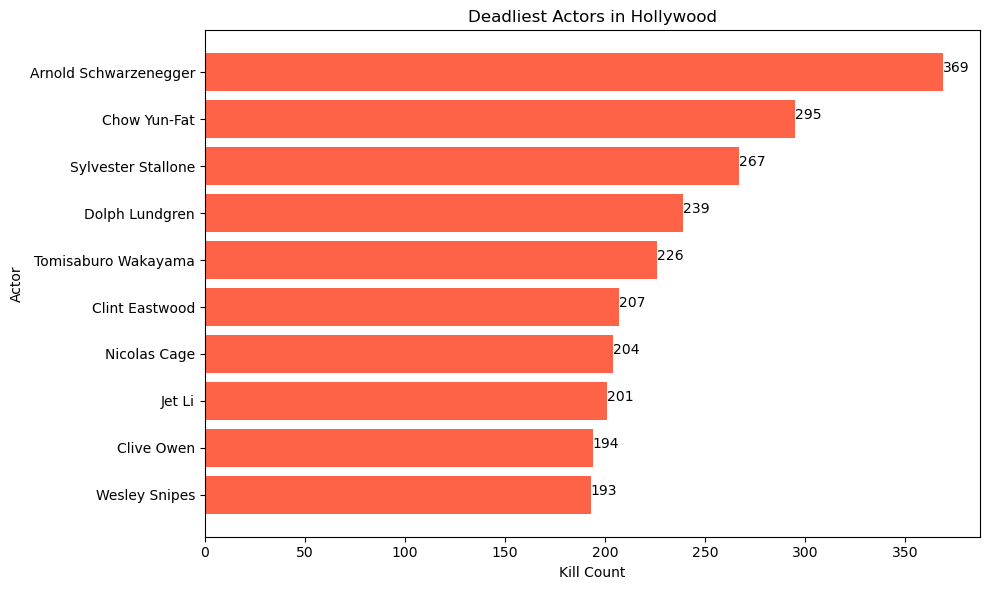

In [289]:
import pandas as pd
import matplotlib.pyplot as plt

data_actor_kill = pd.read_csv('actor_kill_counts.csv')  
display(data_actor_kill.head())

df = data_actor_kill.sort_values(by='Count', ascending=True)

actors = df['Actor']
kill_counts = df['Count']



plt.figure(figsize=(10, 6))

plt.barh(actors, kill_counts, color='tomato')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

for index, value in enumerate(df['Count']):
    plt.text(value, index, str(value))
    
plt.tight_layout()
plt.show()

<body>
    <h3><font color='Tomato'>Question 9</font></h3>
    <p>Create a pie chart showing the fraction of all Roman Emperors that were assassinated.  <br><br>Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.</p>
</body>

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


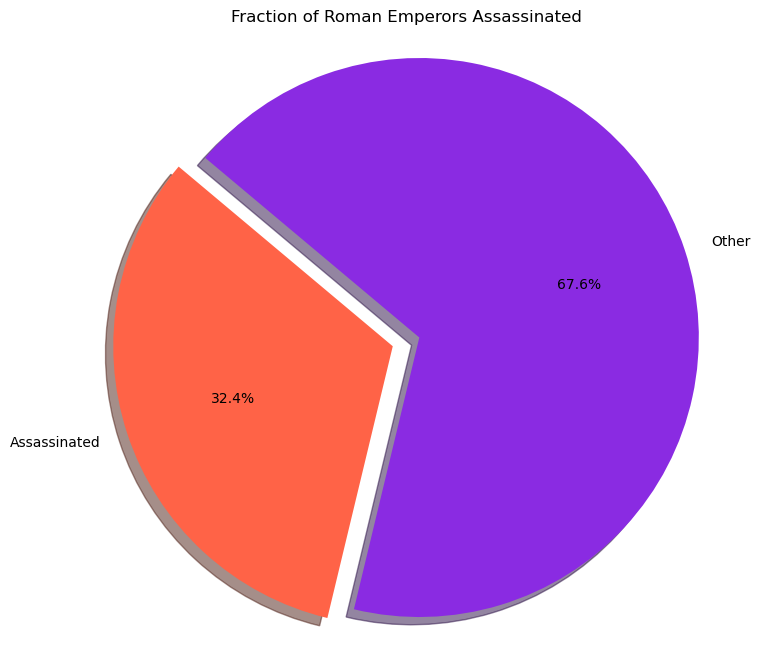

In [300]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'roman-emperor-reigns.csv'
df_Roman = pd.read_csv(filepath)  
display(df_Roman.head())

emperors = len(df_Roman)
assassinated_emperors = len(df_Roman[df_Roman['Cause_of_Death'] == 'Assassinated'])

percentage = (assassinated_emperors / emperors) * 100
percentage_survived = 100 - percentage

labels = ['Assassinated', 'Other']
sizes = [percentage, percentage_survived]
colors = ['tomato', 'blueviolet']
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  

plt.title('Fraction of Roman Emperors Assassinated')
plt.show()


<body>
    <h3><font color='Tomato'>Question 9</font></h3>
    <p>Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.<br><br>Don't forget to label your axes!<br><br>Color each dot according to its year.</p>
</body>

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


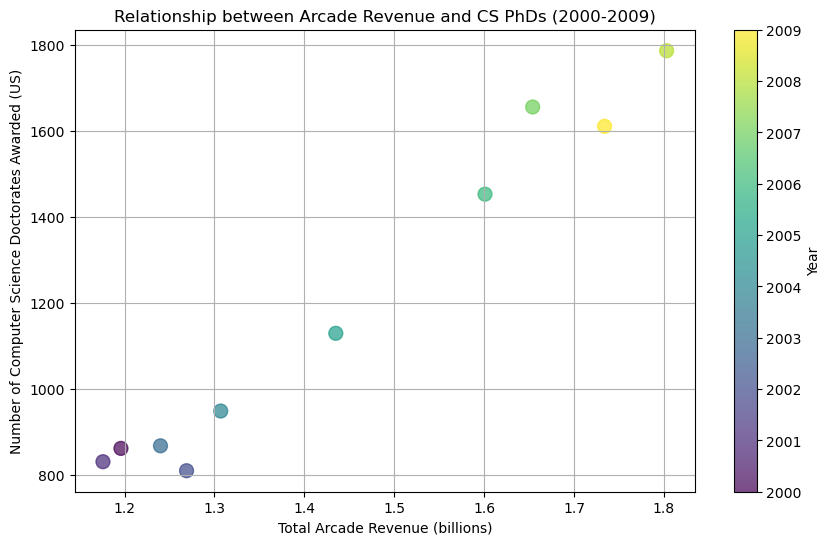

In [303]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'arcade-revenue-vs-cs-doctorates.csv'
df_arcade = pd.read_csv(filePath)  
display(df_arcade.head())

years = df_arcade['Year']
revenue = df_arcade['Total Arcade Revenue (billions)']
cs_phds = df_arcade['Computer Science Doctorates Awarded (US)']


plt.figure(figsize=(10, 6))
plt.scatter(revenue, cs_phds, c=years, cmap='viridis', s=100, alpha=0.7)

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Number of Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)')
plt.colorbar(label='Year')
plt.grid(True)
plt.show()
